In [1]:
import pandas as pd
import numpy as np
from random import choice, randint
from datetime import datetime, timedelta

# 定义常量
KAMPAGNEN = ["Winter Sale", "New Year Promotion", "Valentine's Day", "Product Launch", "Spring Campaign", 
             "Easter Special", "Summer Preview", "Back to School", "Mother's Day", "Memorial Day Sale"]
KANÄLE = ["Social Media", "Email", "Search Engine"]
ZIELGRUPPEN = ["18-35, Female", "25-45, Male", "25-45, All", "18-35, All"]
DATENQUELLEN = ["Google Analytics", "CRM", "Facebook Insights", "Google Ads", "Instagram Insights"]
PROJEKTE = ["Sales Boost Q1", "New Year Campaign", "Valentine Project", "Launch Q1", "Spring Boost", 
            "Easter Project", "Summer Campaign", "School Project", "Mother's Day", "Memorial Campaign"]
KI_ANWENDUNGEN = ["Predictive Analytics", "Chatbot Integration", "Image Recognition", "None"]
MITARBEITER = ["Anna Müller", "Max Schmidt", "Lisa Fischer", "Tom Wagner"]

# 生成数据
data = []
start_date = datetime(2023, 1, 1)
for i in range(1000):
    row = {
        "ID": i + 1,
        "Datum": (start_date + timedelta(days=randint(0, 365))).strftime("%Y-%m-%d"),
        "Kampagne": choice(KAMPAGNEN),
        "Kanal": choice(KANÄLE),
        "Zielgruppe": choice(ZIELGRUPPEN),
        "Budget": randint(5000, 20000),
        "Ausgaben": randint(4500, 19000),
        "Umsatz": randint(20000, 100000),
        "KPI": f"{randint(3, 10)}% {choice(['CTR', 'CR'])}",
        "Datenquelle": choice(DATENQUELLEN),
        "Projekt": choice(PROJEKTE),
        "Projektstatus": choice(["Abgeschlossen", "In Bearbeitung"]),
        "KI_Anwendung": choice(KI_ANWENDUNGEN),
        "Mitarbeiter": choice(MITARBEITER),
        "Bemerkungen": "Simulierte Daten für Analysezwecke"
    }
    data.append(row)

# 创建DataFrame
df = pd.DataFrame(data)

# 导出为Excel
df.to_excel("kampagnen_daten.xlsx", index=False)

In [2]:
import pandas as pd

# Load the data
df = pd.read_excel("kampagnen_daten.xlsx")

# Display the first 5 rows
print(df.head())

   ID       Datum           Kampagne         Kanal     Zielgruppe  Budget  \
0   1  2023-11-04     Back to School  Social Media     18-35, All   13272   
1   2  2023-09-07  Memorial Day Sale         Email  18-35, Female    8980   
2   3  2023-02-27     Product Launch  Social Media    25-45, Male    8680   
3   4  2023-08-11     Summer Preview         Email  18-35, Female   13235   
4   5  2023-09-03    Valentine's Day         Email  18-35, Female    5719   

   Ausgaben  Umsatz     KPI         Datenquelle            Projekt  \
0     14415   54454  9% CTR                 CRM     Easter Project   
1     15449   85104   3% CR  Instagram Insights     Easter Project   
2     11838   68932   9% CR                 CRM       Mother's Day   
3      7715   49244   5% CR                 CRM          Launch Q1   
4     10635   40093  6% CTR          Google Ads  Memorial Campaign   

    Projektstatus          KI_Anwendung   Mitarbeiter  \
0  In Bearbeitung  Predictive Analytics  Lisa Fischer   
1 

In [3]:
# Display basic information about the data
print(df.info())

# Display statistical summary of the data
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             1000 non-null   int64 
 1   Datum          1000 non-null   object
 2   Kampagne       1000 non-null   object
 3   Kanal          1000 non-null   object
 4   Zielgruppe     1000 non-null   object
 5   Budget         1000 non-null   int64 
 6   Ausgaben       1000 non-null   int64 
 7   Umsatz         1000 non-null   int64 
 8   KPI            1000 non-null   object
 9   Datenquelle    1000 non-null   object
 10  Projekt        1000 non-null   object
 11  Projektstatus  1000 non-null   object
 12  KI_Anwendung   769 non-null    object
 13  Mitarbeiter    1000 non-null   object
 14  Bemerkungen    1000 non-null   object
dtypes: int64(4), object(11)
memory usage: 117.3+ KB
None
                ID        Budget      Ausgaben       Umsatz
count  1000.000000   1000.000000   1000.00000

In [4]:
# If there are missing values, fill or drop them
df.fillna(0, inplace=True)  # Fill missing values with 0
# Alternatively, drop missing values
# df.dropna(inplace=True)

In [5]:
# Calculate ROI
df["ROI"] = (df["Umsatz"] - df["Ausgaben"]) / df["Ausgaben"] * 100

# Group by campaign and calculate average ROI
kampagne_roi = df.groupby("Kampagne")["ROI"].mean().sort_values(ascending=False)
print(kampagne_roi)

# Group by channel and calculate average ROI
kanal_roi = df.groupby("Kanal")["ROI"].mean().sort_values(ascending=False)
print(kanal_roi)

Kampagne
Valentine's Day       586.297861
Spring Campaign       538.099304
Memorial Day Sale     534.279396
Winter Sale           533.510591
Product Launch        497.611163
Mother's Day          496.541775
New Year Promotion    477.612736
Summer Preview        459.637939
Back to School        453.308852
Easter Special        449.421055
Name: ROI, dtype: float64
Kanal
Search Engine    514.423639
Social Media     500.312906
Email            491.458918
Name: ROI, dtype: float64


In [6]:
# Group by target group and calculate average ROI
zielgruppe_roi = df.groupby("Zielgruppe")["ROI"].mean().sort_values(ascending=False)
print(zielgruppe_roi)

Zielgruppe
25-45, All       520.209862
25-45, Male      506.254411
18-35, Female    501.469742
18-35, All       482.310715
Name: ROI, dtype: float64


In [7]:
# Group by AI application and calculate average ROI
ki_roi = df.groupby("KI_Anwendung")["ROI"].mean().sort_values(ascending=False)
print(ki_roi)

KI_Anwendung
Chatbot Integration     504.817885
Image Recognition       503.432126
Predictive Analytics    500.934733
0                       500.323871
Name: ROI, dtype: float64


C:\Users\sheng\AppData\Local\Temp\ipykernel_11940\3828178001.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kampagne_roi.index, y=kampagne_roi.values, palette="viridis")


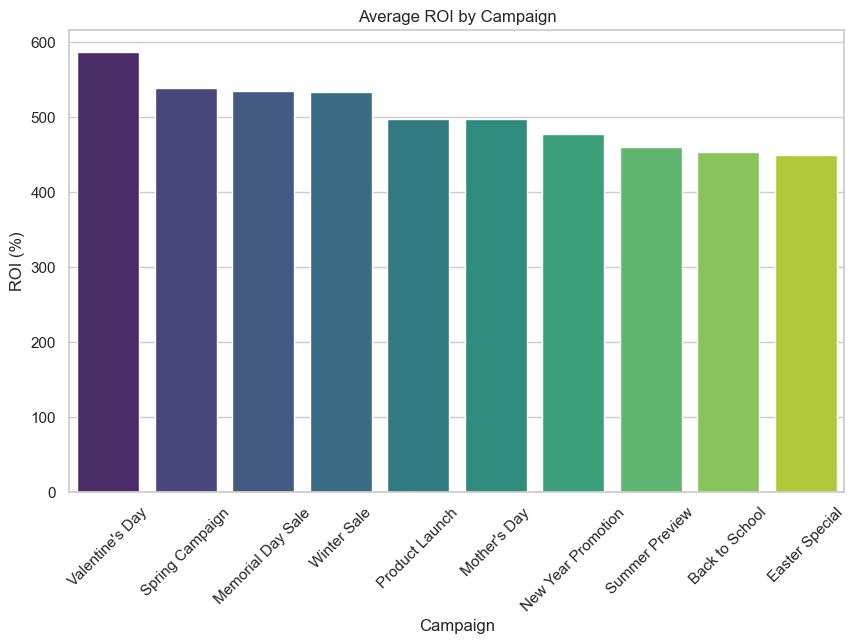

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the theme
sns.set_theme(style="whitegrid")

# Plot campaign ROI as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=kampagne_roi.index, y=kampagne_roi.values, palette="viridis")
plt.title("Average ROI by Campaign")
plt.xlabel("Campaign")
plt.ylabel("ROI (%)")
plt.xticks(rotation=45)
plt.show()

C:\Users\sheng\AppData\Local\Temp\ipykernel_11940\124881545.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kanal_roi.index, y=kanal_roi.values, palette="magma")


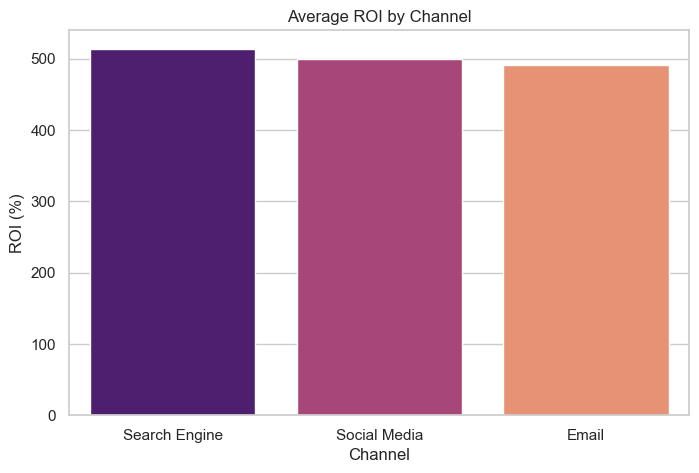

In [9]:
# Plot channel ROI as a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=kanal_roi.index, y=kanal_roi.values, palette="magma")
plt.title("Average ROI by Channel")
plt.xlabel("Channel")
plt.ylabel("ROI (%)")
plt.show()

C:\Users\sheng\AppData\Local\Temp\ipykernel_11940\3380824229.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=zielgruppe_roi.index, y=zielgruppe_roi.values, palette="plasma")


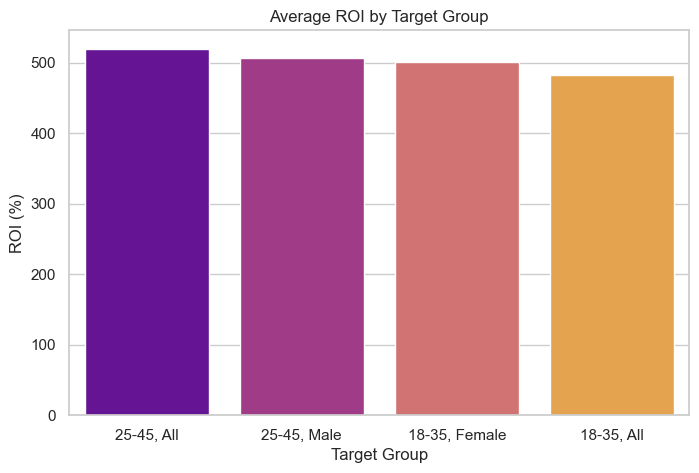

In [10]:
# Plot target group ROI as a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=zielgruppe_roi.index, y=zielgruppe_roi.values, palette="plasma")
plt.title("Average ROI by Target Group")
plt.xlabel("Target Group")
plt.ylabel("ROI (%)")
plt.show()

C:\Users\sheng\AppData\Local\Temp\ipykernel_11940\2964439997.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ki_roi.index, y=ki_roi.values, palette="coolwarm")


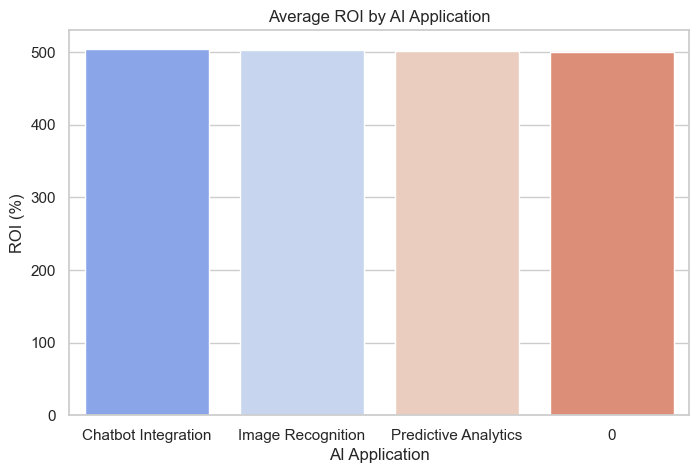

In [11]:
# Plot AI application ROI as a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=ki_roi.index, y=ki_roi.values, palette="coolwarm")
plt.title("Average ROI by AI Application")
plt.xlabel("AI Application")
plt.ylabel("ROI (%)")
plt.show()

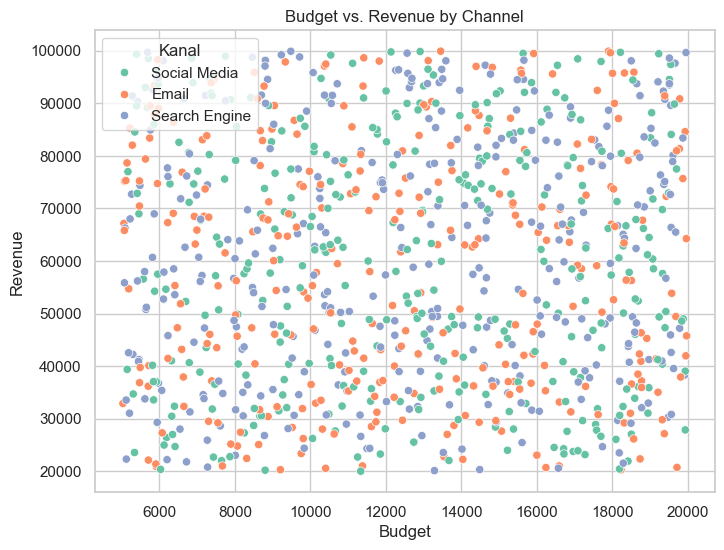

In [12]:
# Plot budget vs. revenue as a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Budget"], y=df["Umsatz"], hue=df["Kanal"], palette="Set2")
plt.title("Budget vs. Revenue by Channel")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.show()

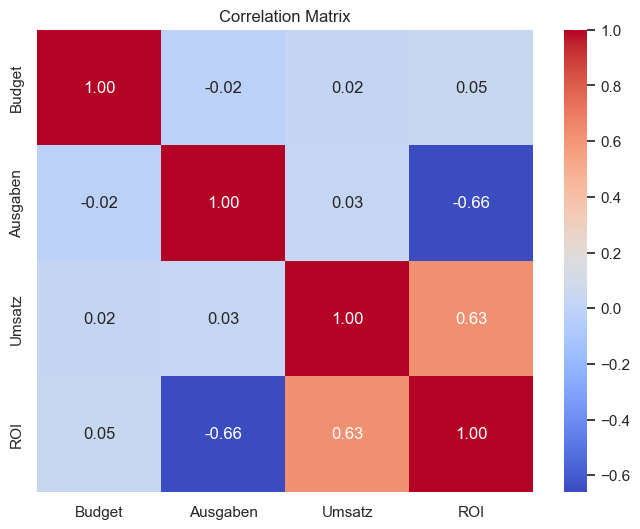

In [13]:
# Calculate the correlation matrix
corr_matrix = df[["Budget", "Ausgaben", "Umsatz", "ROI"]].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

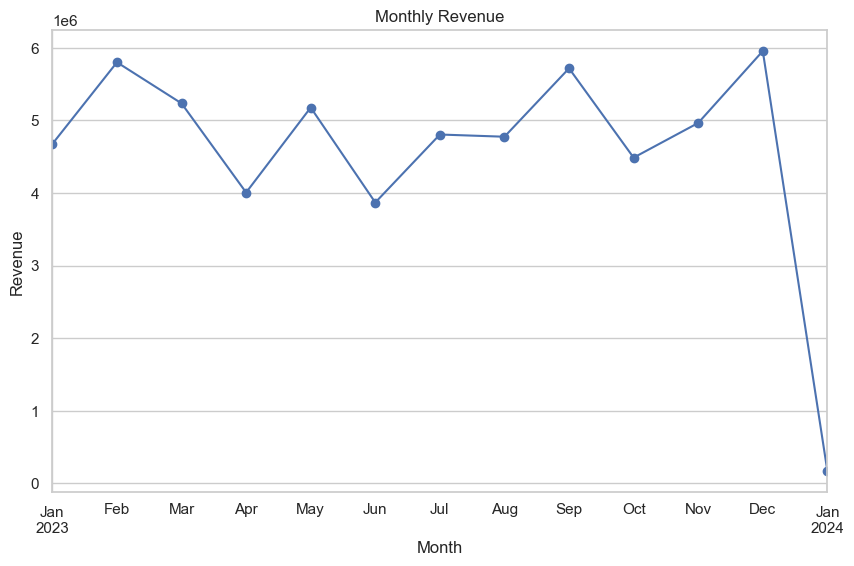

In [14]:
# Convert the date column to datetime format
df["Datum"] = pd.to_datetime(df["Datum"])

# Group by month and calculate total revenue
df["Monat"] = df["Datum"].dt.to_period("M")
monatlicher_umsatz = df.groupby("Monat")["Umsatz"].sum()

# Plot the time series
plt.figure(figsize=(10, 6))
monatlicher_umsatz.plot(kind="line", marker="o", color="b")
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()

In [15]:
# Save ROI analysis results
kampagne_roi.to_excel("kampagne_roi_analysis.xlsx")

# Save visualization as an image
plt.savefig("channel_roi_visualization.png")

<Figure size 640x480 with 0 Axes>